# Welcome to NimWorld! 🌲

One important application of AI is in gaming, which is the perfect place to test out our **adverserial search** algorithms. In this assignment, you will be creating a game world and implementing the **minimax** algorithm. The assignment has three parts with the following point values:



*   Implementing NimWorld! [25 pts]
*   NimWorld Minimax Algorithm [40 pts]
* NimWorld Minimax Algorithm Alpha-Beta Pruning [35 pts]

Please work through the assignment one part at a time! Each part builds off of the previous one, so make sure that it's implemented before you move on. Before you begin to work, please read the ENTIRE assignment first to get a good feel of what to expect, including outputs.**If you need help,** we have provided some resources **at the bottom of the assignment**.



## What is "nim"?

<img src="https://pbs.twimg.com/media/EZwm7xYXgAAbTHW?format=jpg&name=4096x4096" width=500 />

[You can take a look on Wikipedia](https://en.wikipedia.org/wiki/Nim#:~:text=Nim%20is%20a%20mathematical%20game,the%20same%20heap%20or%20pile.) to get a detailed explanation of the game, but basically, two players are given a few piles of objects (we'll use sticks for our game), and players take turns removing any desired number of sticks from any pile until none are left. There are a few versions of the game, but in our version, the player who takes the last stick is deemed the loser. The point of the game is to strategically remove sticks to ensure that the other person is forced to choose the last stick! For example, if we start off with a pile that has two-subpiles of 5 and 3 sticks each (represented in a list as [5,3]) the player can choose whether to take sticks from the first (represented by index 0) or second pile (represented by index 1), and can choose how many sticks to remove. Let's say our player removes 3 from the first pile! That leaves us with a pile of [2,3] sticks, when we originally had [5,3]. Check [this link](https://www.archimedes-lab.org/game_nim/nim.html#) if you want to play the game.

How can we train an intelligent agent to select the best move given a player's move? If a player removes a certain amount of sticks from a certain pile, which pile should the agent choose? How many sticks should the agent remove frm that pile? While there are complicated strategies behind nim that can optimize the best moves based on the XOR sum, we will implement a basic minimax algorithm for a game with only use two piles, represented by a list with two elements representing two piles of sticks **``pile = [numberOfSticks0, numberOfSticks1]``**.

## How do we structure the NimWorld game?

In the cell below, we have defined an abstract class called NimWorldAdversarial as our starting point. This class defines the major functions that all of the subclasses of NimWorldAdversarial will contain and outlines the features you will need to develop.
We will have three subclasses:
*   NimWorldBasic(NimWorldAdversarial)
  * implements the basic game functionality between two players, the computer and the human user playing the game.
  * in this class, both user and computer moves will be inputted by the user.
  * we must ask the player to select which pile they want to remove from (pile 0 or 1) and how many sticks they want to remove (the number of sticks can be no less than 1 or greater than the number of sticks in that pile).
*   NimWorldMinimax(NimWorldBasic)
  * Implements the minimax algorithm logic. NimWorldMinimax will inherit many functions from NimWorldBasic, but we will need to add a minimax function and override the function that specifies the computer's move.
* NimWorldABMinimax(NimWorldMinimax)
  * NimWorldABMinimax will inherit many functions from NimWorldMinimax, but we need to override the minimax function and the computer move function to allow the implementation of alpha-beta pruning.

  Now that we've gone over the basics, take a look at our NimWorldAdversarial class! While you won't be making any modifications here, your subclasses will follow this structure.

In [ ]:
from abc import ABC, abstractmethod
class NimWorldAdversarial(ABC):

  def __init__(self, pile):
    '''
    Initializes the game stick pile as a list.

    - pile: The pile will contains two sub-piles of sticks, referred to as pile 0 and pile 1.
    '''
    self.pile = pile

  @abstractmethod
  def userMove(self):
    '''
    Defines the user's move.
    '''
    pass

  @abstractmethod
  def checkWin(self, pile):
    '''
    Checks if someone has won the game.
    Requires the pile argument.
    Returns True or False.
    '''
    pass

  @abstractmethod
  def computerMove(self):
    '''
    Defines the computer's move.
    '''
    pass

  @abstractmethod
  def play(self):
    '''
    Controls the game flow.
    '''
    pass

  @abstractmethod
  def removeStick(self, selection, number):
    '''
    Removes a stick from the pile based on selected
    sub-pile and number of sticks to be removed.
    '''
    pass

# (25 pts) Implementing NimWorld!
Well, that's basically the assignment. Create a playable nim game and implement minimax logic with alpha-beta pruning into the game! The end! Get to work!
...Well, if you're feeling a little overwhelmed, let's go over the assignment in a more step-by-step manner and build up to all the AI stuff. Let's start off by programming the NimWorld functionality without any intelligent agent logic. You will provide the moves for both the user and computer player here!
We will need one list named **``pile``** with two elements (two sub-piles of sticks). The first pile in our set of piles will be referenced as 0 and the second pile will be referenced as 1.



Here are some details for the functions we need to implement.


* (3pts) removeStick()
  * Removes a stick from the pile. Takes in a value representing which sub-pile the player selected, and how many sticks they selected.
* (5pts) checkWin()
  * Checks if someone has won the game. Returns True if someone has, and False if nobody has won the game. It doesn't matter who. ``Pile`` must be passed into this function to optimize functionality in later parts.
* (7pts) userMove()
  * Gets user input for the sub-pile they want to remove from, and how many sticks they want to remove from the sub-pile.
  * Validates whether move is legal to be consistent with game rules (i.e: cannot remove from a pile that isn't 0 or 1, nor remove a number of sticks that is less than 1 or greater than the number of sticks in the pile).
  * If the move is not legal, ask the user to input another move without switching to the next player. Keep asking until a legal value is entered.
* (2pts) computerMove()
  * In this part, computerMove will be exactly the same code as userMove. You can literally just call userMove() in this method! We are separating them now just to leave space for our AI logic later. Later on, the computer player will use the minimax algorithm to make its own move. For now, the user is making the computer's move.
* (8pts) play()
  * Loops until someone wins (checks for a win after each move by calling the checkWin() function). Remember, if on the user's turn, the board is [0,0], the computer wins! And vice versa. You need to figure out a good place to check for winning, then!
  * Keeps track of how many rounds we have played.
  * Keeps track of our current player.
  * Swaps players after every round.

In the space below, complete the methods!

In [ ]:
class NimWorldBasic(NimWorldAdversarial):

  def __init__(self, pile):
    # initializes our pile
    self.pile = pile

# complete the following methods
  def removeStick(self, selection, number):
    '''
    Removes stick from the pile.
    No return.
    '''
    # your code here
    self.pile[selection] -= number


  #prompts the user to make a move, move must be valid to exit method
  def userMove(self):
    '''
    Collects and validates the user's move selection (gets user input for subpile selection and number of sticks selection).
    No return.
    '''
    # your code here
    selection = int(input("Which pile: "))
    number = int(input("How many: "))
    T = False

    #here is what validates the valid move
    #meaning there can't be more from the user input to remove from the pile
    #then is already in the pile to begin with
    while(T == False):
      if(selection == 1 or selection == 0 and self.pile[selection]>= number):
        self.removeStick(selection,number)
        T = True
      else:
        print("Invalid move go again")
        selection = int(input("Which pile: "))
        number = int(input("How many: "))

  #in this class the computerMove is just going to be the user move
  def computerMove(self):
    '''
    Calls userMove(). Will be overwritten in later sections.
    No return.
    '''
    # your code here
    self.userMove()


  #check to see if both piles are emtpy to see if the player win (returns true)
  def checkWin(self, pile):
      '''
      Checks whether a player has won.
      Returns True (someone won) or False (nobody won).
      '''
      # your code here
      if(pile[0]==0 and pile[1]==0):
        return True
      else:
        return False


  #method that we call to start our game that will alternate turns between user and computer
  def play(self):
      '''
      This function is called on the NimWorldBasic object to start the game.
      We will be using this function in all our classes.
      No return.
      '''
      # your code here
      while(self.checkWin(self.pile) == False):
        print(self.pile[0]," ",self.pile[1])
        print("User goes")
        self.userMove()
        if (self.checkWin(self.pile)) == True:
          print("Computer won!")
          return
        print(self.pile[0]," ",self.pile[1])
        print("Computer goes")
        self.computerMove()
        if(self.checkWin(self.pile)==True):
          print("User won!")
          return






❇️TESTING ZONE❇️ Test your NimWorld game here once you're done implementing the class for this section. Uncomment the following code and see if it works. Test your code with different piles of sticks!

In [37]:

# we are passing a pile into the game that includes two sub-piles of 4 and 5 sticks.
nimBasic = NimWorldBasic([4, 5])
nimBasic.play()

4   5
User goes
Which pile: 0
How many: 2
2   5
Computer goes
Which pile: 1
How many: 3
2   2
User goes
Which pile: 1
How many: 2
2   0
Computer goes
Which pile: 0
How many: 5
Invalid move go again
Which pile: 0
How many: 1
1   0
User goes
Which pile: 0
How many: 1
Computer won!


Below, we have an example of a running game! [You can also view a recording of a test run here.](https://drive.google.com/file/d/1ZEpmhJlZwvWzINlIOqUTP2ZyjLQVmxXq/view?usp=drive_link) Watch how we handle the user making a last-ditch effort to cheat to avoid losing! While you don't need to have exactly the same output, the way the computer responds to users moves should be conceptually similar. Make sure you can make both the computer and the user win! See how the logic behaves.

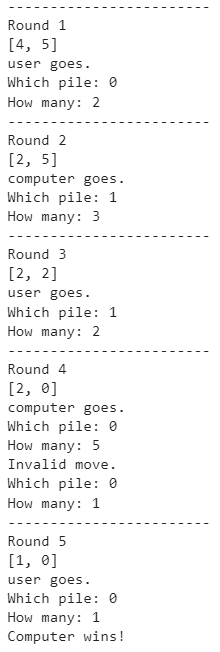

# (40pts) NimWorld Minimax Algorithm
Okay, we have one part out of the way. Now, time to implement the AI logic. Specifically, the minimax algorithm! We will create a new subclass called NimWorldMinimax to implement it. We will be using all of the methods from NimWorldBasic, but we will be overwriting the computerMove() function to automate the computer's move, and we will be implementing the minimax algorithm in the minimax() function.

In the cell below, you will see a description/overview of the two methods' functionalities.

* (15pts) computerMove():

  * This method selects the computer's next move based on the user's move by iterating through all the moves the computer can possibly make from that state. You're going to need to think about how we can represent that! We have to iterate through the two sub-piles in the ``pile``...
  * This method simulates each possible move and calls the minimax() function on those moves to evaluate the outcome for the move.
  * Selects the move that leads to success once we tried our options.
  * Keeps track of best score and best move! (Maybe in a tuple?)
  * Remember, lists are passed by reference! Make sure you are copying the pile properly, maybe using ``pile[:]``
  * Actually makes computer's move.
* (25pts) minimax():
  * Explores all possible moves from the computer's move.
  * Returns a score (1 or -1) for the current move to determine whether it is a favorable outcome for the computer's turn.
  * Includes a recursive call to minimax().
  * Reference your minimax pseudocode for this! What do you do if the player is maximizing? Minimizing?

In [28]:
class NimWorldMinimax(NimWorldBasic):

  #represents the computerMove using the minimax algorithm
  def computerMove(self):
    '''
    Overwrites NimWorldBasic's computerMove() function to allow
    the computer player to autonomously select its next move.
    No return.
    '''

    bestMove = None

    #this representing negative infitity for our alpha value so that any number will replace it
    alpha = -float("inf")

    #loop through both of our piles (subpiles)
    for subPile in range(2):

      #loop through each stick in the current subPile we are in
      for numberSticks in range(1, self.pile[subPile] + 1):

        currentPile = self.pile[:]
        currentPile[subPile] -= numberSticks
        score = self.minimax(currentPile, False)

        #if our new score generated is greater then our alpha
        #it will be our new alpha value
        if score > alpha:
            alpha = score
            bestMove = (subPile, numberSticks)

    #remove sticks of minmax best move
    self.removeStick(bestMove[0], bestMove[1])


  def minimax(self, pile, isMaximizing):
      '''
      Implements the minimax logic.
      Returns 1 or -1.
      '''
      # your code here

      #check if the current state is a winning "state"
      if self.checkWin(pile):
        #return 1 if we are on the max level
        if isMaximizing:
          return 1
        #return -1 if we are on the min level
        else:
          return -1

      if isMaximizing:
        #this representing negative infitity for our alpha value so that any number will replace it
        alpha = -float("inf")
        #loop through both of our piles (subpiles)
        for subPile in range(2):
          #loop through each stick in the current subPile we are in
          for numSticks in range(1, pile[subPile]+1):
            #create a copy of pile with our current pile
            currentPile = pile[:]
            #subtract current sticks we are on through our loop from pile
            currentPile[subPile] -= numSticks
            score = self.minimax(currentPile, False)

            if(score>alpha):
              alpha = score
        return alpha

      else:
        #this representing infitity for our beta value so that any number will replace it
        beta = float("inf")
        #loop through both of our piles (subpiles)
        for subPile in range(2):
          #loop through each stick in the current subPile we are in
          for numSticks in range(1, pile[subPile]+1):
            #create a copy of pile with our current pile
            currentPile = pile[:]
            #subtract current sticks we are on through our loop from pile
            currentPile[subPile] -= numSticks
            score = self.minimax(currentPile, True)

            if (score<beta):
              beta = score

        return beta




❇️TESTING ZONE❇️ Test your NimWorld game here once you're done implementing the class for this section. Uncomment the following code and see if it works. Test your code with different piles of sticks!

In [32]:
nimMin = NimWorldMinimax([10, 7])
nimMin.play()

10   7
User goes
Which pile: 0
How many: 5
5   7
Computer goes
5   5
User goes
Which pile: 1
How many: 4
5   1
Computer goes
0   1
User goes
Which pile: 1
How many: 1
Computer won!


Here's an example of a sample run below! While you don't need to have exactly the same output, the way the computer responds to users moves should be conceptually similar. The computer should be making intelligent moves to ensure you're left with the last stick!

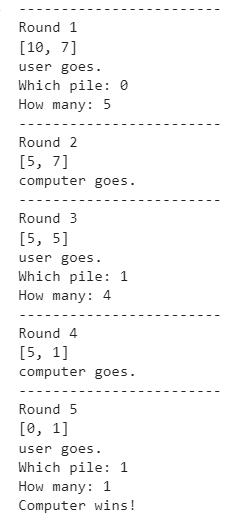

# (35pts) NimWorld Minimax Algorithm Alpha-Beta Pruning

Look at that. We implemented the logic for our adversarial agent! Woo-hoo. We can still optimize our algorithm, however. One method to do so is alpha-beta pruning! That way, we don't have to go down certain branches of the game, saving us time, though not really affecting the output. For this exercise, we will be implementing the subclass NimWorldABMinimax. We will be inheriting methods from the NimWorldMinimax class, but we need to override the minimax() and computerMove() methods (really making only minor changes) to implement alpha-beta pruning. Let's see what you can come up with!

* (25pts) AB Pruning minimax() implementation
* (10pts) AB Pruning computerMove() modification


In [33]:
class NimWorldABMinimax(NimWorldMinimax):
    def computerMove(self):
        '''
        Overwrites NimWorldMinimax's computerMove() function to allow
        the computer player to autonomously select its next move using
        alpha-beta pruning.
        No return.
        '''
        # your code here
        bestMove = None
        #this representing negative infitity for our alpha value so that any number will replace it
        alpha = -float("inf")
        #this representing infitity for our beta value so that any number will replace it
        beta = float("inf")

        #loop through each pile
        for subPile in range(2):
          #loop through each stick remaining in each subPile
            for numberSticks in range(1, self.pile[subPile] + 1):
                currentPile = self.pile[:]
                currentPile[subPile] -= numberSticks
                #get our score through calling the minimax function
                score = self.minimax(currentPile, False, alpha, beta)

                if score > alpha:
                    alpha = score
                    bestMove = (subPile, numberSticks)

                #where the actual pruning takes place if a >= b
                if alpha >= beta:
                    break

        self.removeStick(bestMove[0], bestMove[1])

    def minimax(self, pile, isMaximizing, alpha, beta):
        '''
        Implements the minimax logic with alpha-beta pruning.
        Returns 1 or -1.
        '''
        # your code here
        if self.checkWin(pile):
            if isMaximizing:
                return 1
            else:
                return -1

        if isMaximizing:
            bestScore = -float("inf")
            for subPile in range(2):
                for numSticks in range(1, pile[subPile] + 1):
                    #assign a copy of pile to our currentPile
                    currentPile = pile[:]
                    currentPile[subPile] -= numSticks
                    score = self.minimax(currentPile, False, alpha, beta)

                    #since were maximizing at this point we will
                    #take the lowest of our bestScore and current score
                    bestScore = max(bestScore, score)
                    alpha = max(alpha, bestScore)

                    #where the actual pruning takes place if a >= b
                    if alpha >= beta:
                        break

            return bestScore

        else:
            bestScore = float("inf")
            for subPile in range(2):
                for numSticks in range(1, pile[subPile] + 1):
                    currentPile = pile[:]
                    currentPile[subPile] -= numSticks
                    score = self.minimax(currentPile, True, alpha, beta)

                    #since were minimizing at this point we will
                    #take the lowest of our bestScore and current score
                    bestScore = min(bestScore, score)
                    beta = min(beta, bestScore)

                    #where the actual pruning takes place if a >= b
                    if alpha >= beta:
                        break

            return bestScore





❇️TESTING ZONE❇️ Test your NimWorld game here once you're done implementing the class for this section. Uncomment the following code and see if it works. Test your code with different numbers of sticks!

In [34]:
nimAB = NimWorldABMinimax([11, 3])
nimAB.play()

11   3
User goes
Which pile: 1
How many: 2
11   1
Computer goes
0   1
User goes
Which pile: 1
How many: 1
Computer won!


Here's an example of a sample run below! While you don't need to have exactly the same output, the way the computer responds to users moves should be conceptually similar. The computer should be making intelligent moves to ensure you're left with the last stick!

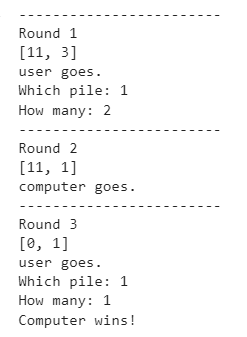

# Need help? 😞 Here's some resources! 🔎 💡

I get it, implementing these algorithms can be tricky.

Minimax behaves recursively, like common implementations of depth-first search, so if you are having difficulty wrapping your head around how it works, then please go back to that! Maybe [this video can help](https://www.youtube.com/watch?v=-LfSbp_6r7c&t=15s).

Want to learn more about minimax? Make sure you have gone through the textbook assignment and [the video for the Adversarial Search module](https://https://uncc.instructure.com/courses/199021/pages/videos-adversarial-search?module_item_id=5500133)! It's very helpful in explaining the intuition behind minimax and alpha-beta pruning. If you would like another explanation, you can also [take a look at this video](https://www.youtube.com/watch?v=l-hh51ncgDI&list=PLIt4aZ9Zq3EB9gj0aTMvz0EOEbBU50L6I&index=106&t=315s&ab_channel=SebastianLague), which provides an easy-to-understand explanation and easy-to-read pseudocode alongside a detailed example. It also explains both the normal minimax algorithm and the alpha-beta pruning variation!

This video series below series gives a full code implementation of a tic-tac-toe implementation of the minimax() algorithm! Its implementation is quite similar to what you need to do for this assignment, so it may be helpful to take a look at.

Tic-Tac-Toe [Part 1](https://www.youtube.com/watch?v=JC1QsLOXp-I&list=PLIt4aZ9Zq3EB9gj0aTMvz0EOEbBU50L6I&index=106&ab_channel=JavaCodingCommunity-ProgrammingTutorials)

Tic-Tac-Toe [Part 2](https://https://www.youtube.com/watch?v=2Tr8LkyU78c&list=PLIt4aZ9Zq3EB9gj0aTMvz0EOEbBU50L6I&index=105&ab_channel=JavaCodingCommunity-ProgrammingTutorials)